In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv("insurance.csv")
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [3]:
def find(data, el):
    for i in data.index.tolist():
        if data.loc[i, "charges"] == el:
            return data.loc[i, "age"]

In [4]:
y_charges = list(data.loc[:, "charges"])

y_1 = [y for y in y_charges if y <= 15000]
y_2 = [y for y in y_charges if y <= 32500 and y >= 15000]
y_3 = [y for y in y_charges if y <= 65000 and y >= 32500]

x_1 = [find(data, y) for y in y_1]
x_2 = [find(data, y) for y in y_2]
x_3 = [find(data, y) for y in y_3]

dataf_1 = pd.DataFrame({"age":x_1, "charges":y_1})
dataf_2 = pd.DataFrame({"age":x_2, "charges":y_2})
dataf_3 = pd.DataFrame({"age":x_3, "charges":y_3})

In [5]:
def gradient_descent(m_current, b_current, dataframe, L):
    m_deriv = 0
    b_deriv = 0
    n = len(dataframe)
    
    for i in range(0, n):
        x =  dataframe.iloc[i].age
        y = dataframe.iloc[i].charges
        
        m_deriv += -(2/n)*x*(y - (m_current*x + b_current))
        b_deriv += -(2/n)*(y - (m_current*x + b_current))
        
    m = m_current - m_deriv*L
    b = b_current - b_deriv*L
    return m,b
m_b_values = []

In [6]:
m = 0
b = 0
L = 0.0001
iter = 1500
for i in range(iter):
    m,b = gradient_descent(m, b, dataf_1, L)
    if i % 100 == 0:
        print(f"{i} iterations")
m_b_values.append((m,b))

0 iterations
100 iterations
200 iterations
300 iterations
400 iterations
500 iterations
600 iterations
700 iterations
800 iterations
900 iterations
1000 iterations
1100 iterations
1200 iterations
1300 iterations
1400 iterations


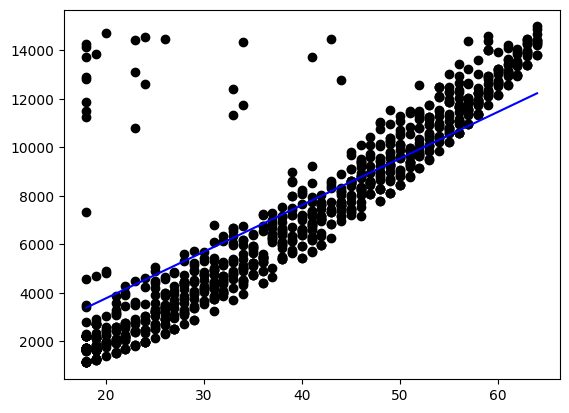

In [7]:


plt.scatter(dataf_1.age, dataf_1.charges, c = "black")
plt.plot(list(range(18, 65)), [(m*x + b) for x in range(18, 65)], c = "blue")

#plt.scatter(dataf_2.age, dataf_2.charges, c = "black")
#plt.plot(list(range(0, 70)), [(m2*x + b2) for x in range(0, 70)], c = "blue")

#plt.scatter(dataf_3.age, dataf_3.charges, c = "black")
#plt.plot(list(range(0, 70)), [(m3*x + b3) for x in range(0, 70)], c = "blue")

#plt.scatter(x_1, y_1, c = "#0F1BFF")
#plt.scatter(x_2, y_2, c = "#8888FF")
#plt.scatter(x_3, y_3, c = "#AFAFFF")


0 iterations
100 iterations
200 iterations
300 iterations
400 iterations
500 iterations
600 iterations
700 iterations
800 iterations
900 iterations
1000 iterations
1100 iterations
1200 iterations
1300 iterations
1400 iterations


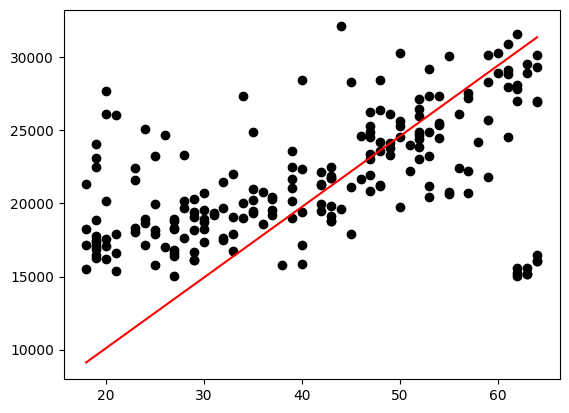

In [8]:
for i in range(iter):
    m,b = gradient_descent(m, b, dataf_2, L)
    if i % 100 == 0:
        print(f"{i} iterations")
m_b_values.append((m,b))
        
plt.scatter(dataf_2.age, dataf_2.charges, c = "black")
plt.plot(list(range(18, 65)), [(m*x + b) for x in range(18, 65)], c = "red")

0 iterations
100 iterations
200 iterations
300 iterations
400 iterations
500 iterations
600 iterations
700 iterations
800 iterations
900 iterations
1000 iterations
1100 iterations
1200 iterations
1300 iterations
1400 iterations


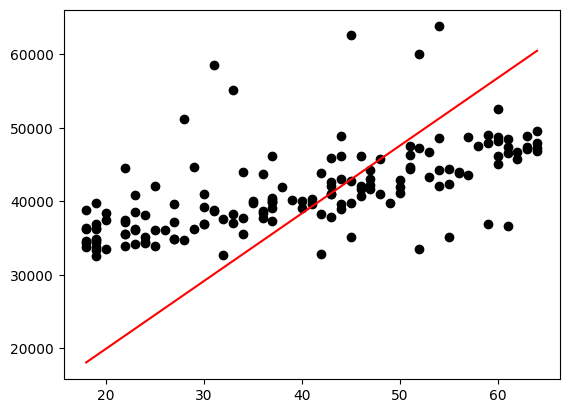

In [9]:
for i in range(iter):
    m,b = gradient_descent(m, b, dataf_3, L)
    if i % 100 == 0:
        print(f"{i} iterations")
m_b_values.append((m,b))
        
plt.scatter(dataf_3.age, dataf_3.charges, c = "black")
plt.plot(list(range(18, 65)), [(m*x + b) for x in range(18, 65)], c = "red")

In [10]:
print(m_b_values)

[(192.3761066401651, -81.04960262213554), (483.6693888429486, 414.5897477607277), (921.9194989934977, 1459.695901190514)]
